In [2]:
import sys
import numba
import swifter
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

In [3]:
bid_1 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_10k.csv")
bid_2 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_20k.csv")
bid_3 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_30k.csv")
bid_4 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_40k.csv")
bid_5 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_50k.csv")
bid_6 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_60k.csv")
bid_7 = pd.read_csv("../Data/lender_bid_fe/lender_bid_fe_65k.csv")

In [4]:
bid_frames = [bid_1, bid_2, bid_3, bid_4, bid_5, bid_6, bid_7]

In [5]:
data = pd.concat(bid_frames)
data = data[['ListingKey', 'MemberKey', 'LenderWinningBids', 'LenderTotalBids']]
data["LenderBidWinningRate"] = data['LenderWinningBids'] / data['LenderTotalBids']
data[["ListingKey", "MemberKey", "LenderBidWinningRate"]].to_csv("../Data/lender_bid_winning_rate.csv", index=False)
print len(data)
data.head()

,ListingKey,MemberKey,LenderWinningBids,LenderTotalBids,LenderBidWinningRate
0,3FF03364988124297E13A05,033E336453973913915CD6B,37,123,0.301
1,25713364434040193913F01,033E336453973913915CD6B,42,138,0.304
2,B8953365111581953FDF6FF,033E336453973913915CD6B,36,116,0.310
3,5D64336458879460900B458,033E336453973913915CD6B,25,83,0.301
4,113D3366128622300E1DBFD,033E336453973913915CD6B,25,84,0.298


9733452

In [ ]:
data = pd.concat(bid_frames)
data['Listing_Key'] = data.ListingKey
data = data[['Listing_Key', 'ListingKey', 'LenderWinningBids', 'LenderTotalBids']]
data["LenderBidWinningRate"] = data['LenderWinningBids'] / data['LenderTotalBids']
data.head()

In [5]:
del bid_1
del bid_2
del bid_3
del bid_4
del bid_5
del bid_6
del bid_7
del bid_frames

## Mean

In [6]:
f_avg = {'ListingKey': ['max'],
         'LenderTotalBids': ['mean'],
         'LenderWinningBids': ['mean'],
         'LenderBidWinningRate': ['mean']
}
lender_mean_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_avg).as_matrix())
lender_mean_attr = lender_mean_attr.rename(index=str, columns={0: "LenderAvgWinningBids", 
                                                             1: "LenderAvgTotalBids",
                                                             2: "LenderAvgBidWinningRate",
                                                             3: "ListingKey"})
lender_mean_attr.head()

,LenderAvgWinningBids,LenderAvgTotalBids,LenderAvgBidWinningRate,ListingKey
0,568.500,949.500,0.632,00003383856420083050622
1,5530.000,5776.000,0.957,00003405662222292C12B86
2,8989.000,9199.000,0.977,000034085359462718B9059
3,508.000,713.500,0.671,000034203787284229CBEF1
4,677.933,947.000,0.597,00003423466422120D65CA3


## Median Deviation

In [7]:
# f_median = {'ListingKey': ['max'],
#          'LenderTotalBids': ['median'],
#          'LenderWinningBids': ['median'],
#          'LenderBidWinningRate': ['median']
# }
# lender_median_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_median).as_matrix())
# lender_median_attr = lender_median_attr.rename(index=str, columns={0: "LenderMedianWinningBids", 
#                                                                  1: "LenderMedianTotalBids",
#                                                                  2: "LenderMedianBidWinningRate",
#                                                                  3: "ListingKey"})
# lender_median_attr.head()

## Standard Deviation

In [8]:
# f_std = {'ListingKey': ['max'],
#          'LenderTotalBids': ['std'],
#          'LenderWinningBids': ['std'],
#          'LenderBidWinningRate': ['std']
# }

# lender_std_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_std).as_matrix())
# lender_std_attr = lender_std_attr.rename(index=str, columns={0: "LenderStdWinningBids", 
#                                                                  1: "LenderStdTotalBids",
#                                                                  2: "LenderStdBidWinningRate",
#                                                                  3: "ListingKey"})
# lender_std_attr.head()

## Merge Bid Feature DataFrames

In [9]:
# Prepare final data
final_lender_data = lender_mean_attr
# final_lender_data = final_lender_data.merge(lender_median_attr, on="ListingKey")
# final_lender_data = final_lender_data.merge(lender_std_attr, on="ListingKey")
final_lender_data.head()

,LenderAvgWinningBids,LenderAvgTotalBids,LenderAvgBidWinningRate,ListingKey
0,568.500,949.500,0.632,00003383856420083050622
1,5530.000,5776.000,0.957,00003405662222292C12B86
2,8989.000,9199.000,0.977,000034085359462718B9059
3,508.000,713.500,0.671,000034203787284229CBEF1
4,677.933,947.000,0.597,00003423466422120D65CA3


## Import Class Variable

In [10]:
listing_data = pd.read_csv("../Data/ProjectLevelData.txt", sep="|")
listing_data = listing_data.loc[(listing_data['RepaidOrNot']==True) | (listing_data['RepaidOrNot']==False)]
listing_data = listing_data[["ListingKey", "RepaidOrNot"]]
listing_data.head()

,ListingKey,RepaidOrNot
17,00033425227988088FA6752,True
21,000433785890431972B4743,False
38,00083422661625108817246,True
46,000A34209897973969CFA81,True
56,000D3410451511356B08F17,True


## Merge Features and Class Variable

In [11]:
final_data = final_lender_data.merge(listing_data, on="ListingKey")
final_data['RepaidOrNot'] = final_data['RepaidOrNot'].astype(int)
final_data.head()

,LenderAvgWinningBids,LenderAvgTotalBids,LenderAvgBidWinningRate,ListingKey,RepaidOrNot
0,480.000,698.000,0.702,00033425227988088FA6752,1
1,163.267,242.167,0.654,000433785890431972B4743,0
2,297.752,479.518,0.587,00083422661625108817246,1
3,85.500,170.500,0.521,000A34209897973969CFA81,1
4,200.218,355.222,0.501,000D3410451511356B08F17,1


## Check Feature Correlation

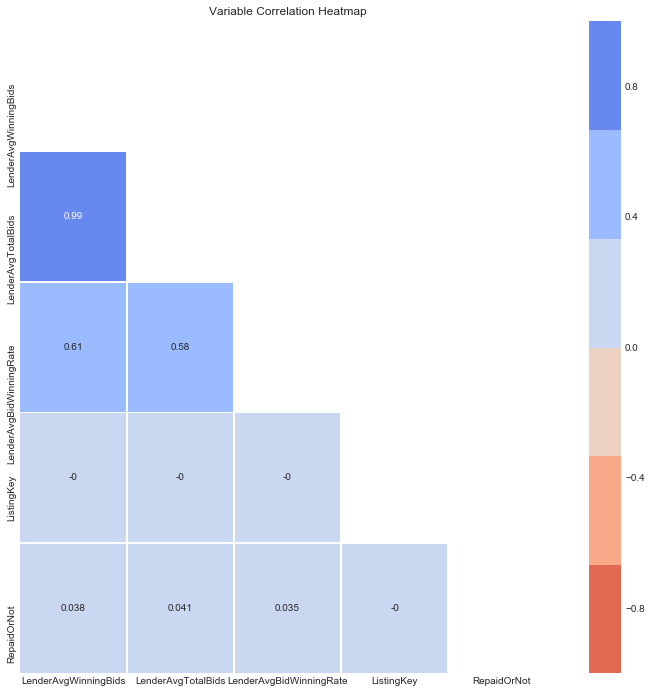

In [12]:
corr = final_data.swifter.apply(pd.to_numeric, errors='coerce').corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        linewidths=.5,
        vmin=-1,
        vmax=1,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Save Data to CSV

In [14]:
## Save data to csv file
# final_lender_data.to_csv("../Data/lender_listing_attr_filtered.csv", index=False)
# selected_attributes = ["LenderAvgBidWinningRate", "LenderAvgWinningBids", "LenderAvgTotalBids"]
final_lender_data.to_csv("../Data/lender_bid_attr.csv", index=False)